# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(weather_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lng"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    #sleep
    time.sleep(1)
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 2 of Set 1 | waitangi
City not found. Skipping...
Processing Record 3 of Set 1 | stanley
City not found. Skipping...
Processing Record 4 of Set 1 | zhaotong
City not found. Skipping...
Processing Record 5 of Set 1 | port mathurin
City not found. Skipping...
Processing Record 6 of Set 1 | inekar
City not found. Skipping...
Processing Record 7 of Set 1 | arquitecto tomas romero pereira
City not found. Skipping...
Processing Record 8 of Set 1 | buala
City not found. Skipping...
Processing Record 9 of Set 1 | nova vicosa
City not found. Skipping...
Processing Record 10 of Set 1 | kone
City not found. Skipping...
Processing Record 11 of Set 1 | vradiyivka
City not found. Skipping...
Processing Record 12 of Set 1 | tiksi
City not found. Skipping...
Processing Record 13 of Set 1 | charlestown
City not found. Skipping...
Processing Record 14

City not found. Skipping...
Processing Record 17 of Set 3 | guarapari
City not found. Skipping...
Processing Record 18 of Set 3 | puerto baquerizo moreno
City not found. Skipping...
Processing Record 19 of Set 3 | east haddam
City not found. Skipping...
Processing Record 20 of Set 3 | ivdel'
City not found. Skipping...
Processing Record 21 of Set 3 | afaahiti
City not found. Skipping...
Processing Record 22 of Set 3 | hawaiian paradise park
City not found. Skipping...
Processing Record 23 of Set 3 | burang
City not found. Skipping...
Processing Record 24 of Set 3 | kloulklubed
City not found. Skipping...
Processing Record 25 of Set 3 | kenai
City not found. Skipping...
Processing Record 26 of Set 3 | talnakh
City not found. Skipping...
Processing Record 27 of Set 3 | codrington
City not found. Skipping...
Processing Record 28 of Set 3 | kununurra
City not found. Skipping...
Processing Record 29 of Set 3 | avarua
City not found. Skipping...
Processing Record 30 of Set 3 | adra
City not 

City not found. Skipping...
Processing Record 34 of Set 5 | katsuren-haebaru
City not found. Skipping...
Processing Record 35 of Set 5 | homs
City not found. Skipping...
Processing Record 36 of Set 5 | thompson
City not found. Skipping...
Processing Record 37 of Set 5 | flin flon
City not found. Skipping...
Processing Record 38 of Set 5 | bodo
City not found. Skipping...
Processing Record 39 of Set 5 | adeje
City not found. Skipping...
Processing Record 40 of Set 5 | qoryooley
City not found. Skipping...
Processing Record 41 of Set 5 | nova sintra
City not found. Skipping...
Processing Record 42 of Set 5 | aykol
City not found. Skipping...
Processing Record 43 of Set 5 | baillif
City not found. Skipping...
Processing Record 44 of Set 5 | novosergiyevka
City not found. Skipping...
Processing Record 45 of Set 5 | zhanaozen
City not found. Skipping...
Processing Record 46 of Set 5 | nantucket
City not found. Skipping...
Processing Record 47 of Set 5 | atbasar
City not found. Skipping...
P

City not found. Skipping...
Processing Record 3 of Set 8 | namdrik
City not found. Skipping...
Processing Record 4 of Set 8 | lerwick
City not found. Skipping...
Processing Record 5 of Set 8 | menaka
City not found. Skipping...
Processing Record 6 of Set 8 | ak'ordat
City not found. Skipping...
Processing Record 7 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 8 of Set 8 | changji
City not found. Skipping...
Processing Record 9 of Set 8 | reggane
City not found. Skipping...
Processing Record 10 of Set 8 | sarina
City not found. Skipping...
Processing Record 11 of Set 8 | port macquarie
City not found. Skipping...
Processing Record 12 of Set 8 | nuuk
City not found. Skipping...
Processing Record 13 of Set 8 | khandyga
City not found. Skipping...
Processing Record 14 of Set 8 | anacortes
City not found. Skipping...
Processing Record 15 of Set 8 | lompoc
City not found. Skipping...
Processing Record 16 of Set 8 | kingscliff
City not found. Skipping...
Processing Recor

Processing Record 19 of Set 10 | new norfolk
City not found. Skipping...
Processing Record 20 of Set 10 | altay
City not found. Skipping...
Processing Record 21 of Set 10 | kasane
City not found. Skipping...
Processing Record 22 of Set 10 | aracruz
City not found. Skipping...
Processing Record 23 of Set 10 | muynoq
City not found. Skipping...
Processing Record 24 of Set 10 | basco
City not found. Skipping...
Processing Record 25 of Set 10 | queenstown
City not found. Skipping...
Processing Record 26 of Set 10 | kimbe
City not found. Skipping...
Processing Record 27 of Set 10 | gurupi
City not found. Skipping...
Processing Record 28 of Set 10 | lamu
City not found. Skipping...
Processing Record 29 of Set 10 | tottori
City not found. Skipping...
Processing Record 30 of Set 10 | new plymouth
City not found. Skipping...
Processing Record 31 of Set 10 | trairi
City not found. Skipping...
Processing Record 32 of Set 10 | kolonia
City not found. Skipping...
Processing Record 33 of Set 10 | yu

City not found. Skipping...
Processing Record 36 of Set 12 | brookings
City not found. Skipping...
Processing Record 37 of Set 12 | perry
City not found. Skipping...
Processing Record 38 of Set 12 | turka
City not found. Skipping...
Processing Record 39 of Set 12 | borogontsy
City not found. Skipping...
Processing Record 40 of Set 12 | fakenham
City not found. Skipping...
Processing Record 41 of Set 12 | guantanamo
City not found. Skipping...
Processing Record 42 of Set 12 | pangody
City not found. Skipping...
Processing Record 43 of Set 12 | baie-comeau
City not found. Skipping...
Processing Record 44 of Set 12 | pokrov
City not found. Skipping...
Processing Record 45 of Set 12 | karasuk
City not found. Skipping...
Processing Record 46 of Set 12 | san jose de mayo
City not found. Skipping...
Processing Record 47 of Set 12 | chernyshevskiy
City not found. Skipping...
Processing Record 48 of Set 12 | 'ibri
City not found. Skipping...
Processing Record 49 of Set 12 | cekerek
City not fou

In [35]:
# Secondary work with error handling
rows = []

# loop cities
for city in cities:
    
    try:

        # geolocation
        geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
        response = requests.get(geo_url)

        if (response.status_code == 200):
            # do work
            geo_data = response.json()

            # get lat, lon, country, name
            if len(geo_data) > 0:
                lat = geo_data[0].get("lat", np.nan)
                lon = geo_data[0].get("lon", np.nan)
                country = geo_data[0].get("country", None)
                name = geo_data[0].get("name", None)

        #         print(f"{city} is located at {lat},{lon}")

                if (lat and lon):
                    # weather
                    weather_url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial"
                    response2 = requests.get(weather_url)

                    if (response2.status_code == 200):
                        weather_data = response2.json()

                        # extract data
                        temp = weather_data.get("main", {}).get("temp", np.nan)
                        pressure = weather_data.get("main", {}).get("pressure", np.nan)
                        humidity = weather_data.get("main", {}).get("humidity", np.nan)
                        wind_speed = weather_data.get("wind", {}).get("speed", np.nan)
                        cloudiness = weather_data.get("clouds", {}).get("all", np.nan)
                        date = wind_speed = weather_data.get("dt", np.nan)

                        # build row
                        row = {"city": name,
                               "country": country,
                               "latitude": lat,
                               "longitude": lon,
                               "temperature": temp,
                               "pressure": pressure,
                               "humidity": humidity,
                               "wind_speed": wind_speed,
                              "cloudiness": cloudiness,
                              "date": date}

                        #print(row)
                        rows.append(row)

                    else:
                        print(f"Getting Weather Data failed with status code: {response2.status_code}. More info below:")
                        print(weather_data)
                else:
                    print("Failed to extract latitude and longitude from response.")
                    print(geo_data)
            else:
                print(f"Did not find any geolocation data for city: {city}")
        else:
            print(f"Getting geolocation data failed with status code: {response.status_code}. More info below:")
            print(geo_data)
    except Exception as e:
        print(f"/Uh oh! Something went wrong for {city}")
        print(e)
    
    # sleep 
    print(f"{city} was processed successfully.")
    time.sleep(1)

port-aux-francais was processed successfully.
waitangi was processed successfully.
stanley was processed successfully.
zhaotong was processed successfully.
port mathurin was processed successfully.
inekar was processed successfully.
arquitecto tomas romero pereira was processed successfully.
buala was processed successfully.
nova vicosa was processed successfully.
kone was processed successfully.
Did not find any geolocation data for city: vradiyivka
vradiyivka was processed successfully.
tiksi was processed successfully.
charlestown was processed successfully.
kharkhorin was processed successfully.
sisimiut was processed successfully.
ushuaia was processed successfully.
gumel was processed successfully.
haapsalu was processed successfully.
barra de santo antonio was processed successfully.
taiohae was processed successfully.
puerto natales was processed successfully.
sinabang was processed successfully.
gizo was processed successfully.
yellowknife was processed successfully.
mejit was

ola was processed successfully.
takoradi was processed successfully.
lospalos was processed successfully.
vasylivka was processed successfully.
qui nhon was processed successfully.
hasaki was processed successfully.
fort bragg was processed successfully.
manadhoo was processed successfully.
itoman was processed successfully.
nouadhibou was processed successfully.
cockburn town was processed successfully.
ar ruways was processed successfully.
sosnovo-ozerskoye was processed successfully.
shuangjiang was processed successfully.
port sudan was processed successfully.
waingapu was processed successfully.
alice springs was processed successfully.
bredasdorp was processed successfully.
udachny was processed successfully.
mpika was processed successfully.
carnarvon was processed successfully.
sorong was processed successfully.
Getting geolocation data failed with status code: 400. More info below:
[{'name': 'Sorong', 'local_names': {'ru': 'Соронг', 'uk': 'Соронг', 'zh': '索龍', 'en': 'Sorong', 

dudinka was processed successfully.
miyazu was processed successfully.
praia da vitoria was processed successfully.
awjilah was processed successfully.
phibun mangsahan was processed successfully.
raghogarh was processed successfully.
Did not find any geolocation data for city: chichen-itza
chichen-itza was processed successfully.
edson was processed successfully.
antsiranana was processed successfully.
arraial do cabo was processed successfully.
petoskey was processed successfully.
grantham was processed successfully.
revda was processed successfully.
Did not find any geolocation data for city: manismata
manismata was processed successfully.
carolina beach was processed successfully.
zaragoza was processed successfully.
toliara was processed successfully.
ericeira was processed successfully.
wenchang was processed successfully.
al jawf was processed successfully.
orkney was processed successfully.
gavle was processed successfully.
ad dilam was processed successfully.
purranque was pro

fakenham was processed successfully.
guantanamo was processed successfully.
pangody was processed successfully.
baie-comeau was processed successfully.
pokrov was processed successfully.
karasuk was processed successfully.
san jose de mayo was processed successfully.
chernyshevskiy was processed successfully.
'ibri was processed successfully.
cekerek was processed successfully.
praya was processed successfully.


In [36]:
df = pd.DataFrame(rows)
df

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Port-aux-Français,FR,-49.349761,70.219956,39.60,1009,67,1683953727,100,1683953727
1,Waitangi,NZ,-35.270465,174.080459,61.56,1027,81,1683953729,44,1683953729
2,Stanley,FK,-51.695057,-57.849169,37.74,1006,65,1683953731,85,1683953731
3,Zhaotong City,CN,27.341751,103.714692,62.94,1017,50,1683953733,100,1683953733
4,Port Mathurin,MU,-19.680837,63.422113,78.91,1020,69,1683953734,21,1683953734
...,...,...,...,...,...,...,...,...,...,...
561,San José,UY,-34.339677,-56.713866,56.50,1017,50,1683954784,95,1683954784
562,Chernyshevskiy,RU,63.015592,112.464235,42.12,999,70,1683954786,100,1683954786
563,Ibri,OM,23.217868,56.492194,94.91,1010,18,1683954788,0,1683954788
564,Çekerek,TR,40.064957,35.507250,48.81,1017,94,1683954789,100,1683954789


In [38]:
# Convert the cities weather data into a Pandas DataFrame
df = pd.DataFrame(rows)

# Show Record Count
df.count()

city           566
country        566
latitude       566
longitude      566
temperature    566
pressure       566
humidity       566
wind_speed     566
cloudiness     566
date           566
dtype: int64

In [39]:
# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Port-aux-Français,FR,-49.349761,70.219956,39.60,1009,67,1683953727,100,1683953727
1,Waitangi,NZ,-35.270465,174.080459,61.56,1027,81,1683953729,44,1683953729
2,Stanley,FK,-51.695057,-57.849169,37.74,1006,65,1683953731,85,1683953731
3,Zhaotong City,CN,27.341751,103.714692,62.94,1017,50,1683953733,100,1683953733
4,Port Mathurin,MU,-19.680837,63.422113,78.91,1020,69,1683953734,21,1683953734


In [41]:
# Export the City_Data into a csv
df.to_csv("cities.csv", index_label="City_ID")

In [43]:
# Read saved data
df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
City_ID,,,,,,,,,,
0,Port-aux-Français,FR,-49.349761,70.219956,39.60,1009,67,1683953727,100,1683953727
1,Waitangi,NZ,-35.270465,174.080459,61.56,1027,81,1683953729,44,1683953729
2,Stanley,FK,-51.695057,-57.849169,37.74,1006,65,1683953731,85,1683953731
3,Zhaotong City,CN,27.341751,103.714692,62.94,1017,50,1683953733,100,1683953733
4,Port Mathurin,MU,-19.680837,63.422113,78.91,1020,69,1683953734,21,1683953734


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

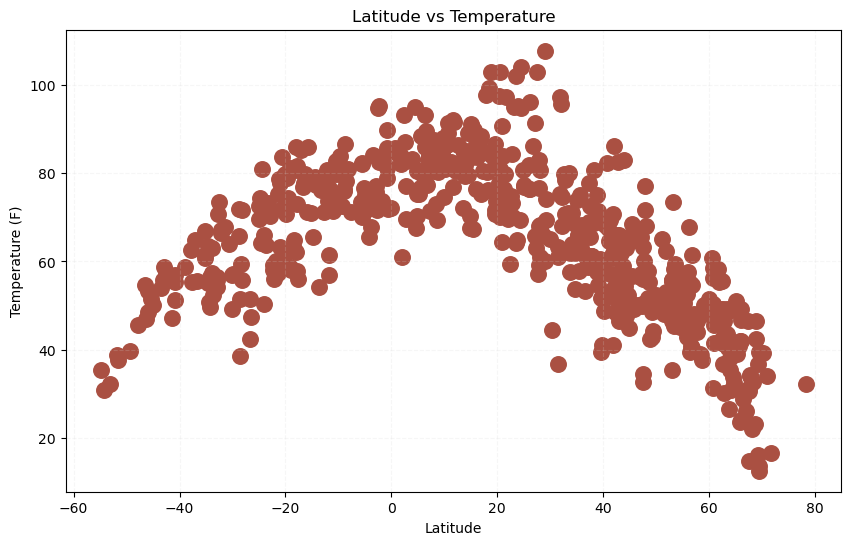

In [74]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.temperature, color="#AA5042", s=125)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

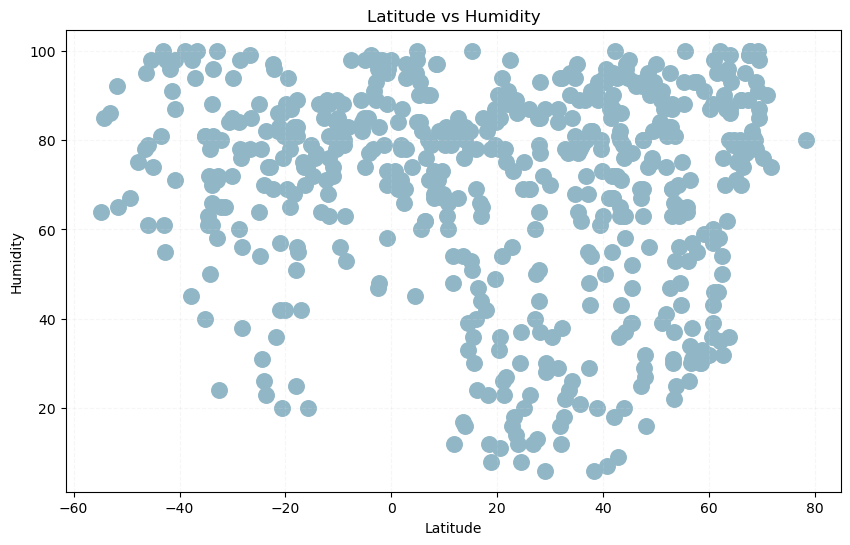

In [73]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.humidity, color="#91B7C7", s=125)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

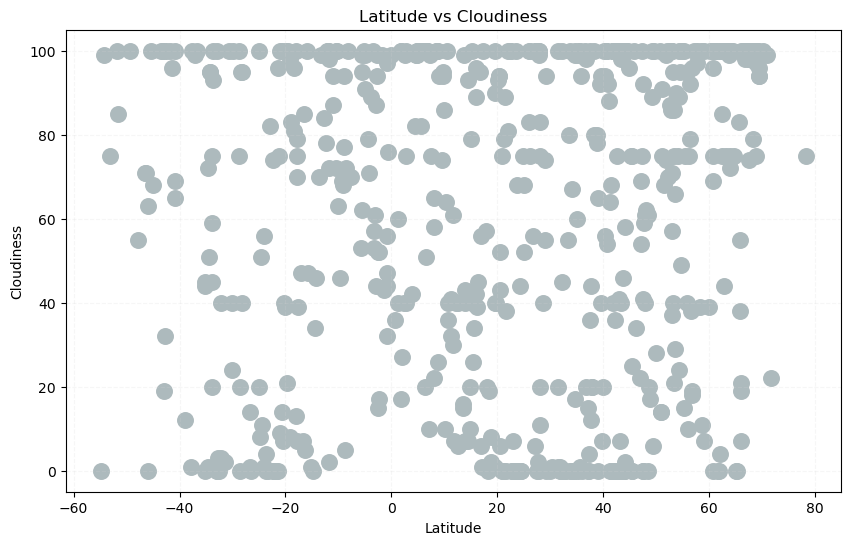

In [72]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.cloudiness, color="#ADBABD", s=125)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

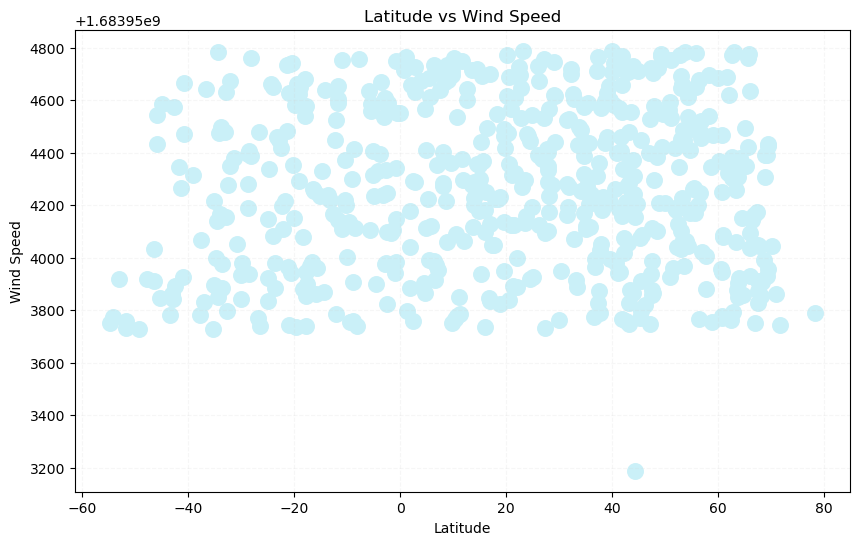

In [71]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.figure(figsize=(10,6))

plt.scatter(df.latitude, df.wind_speed, color="#CAF0F8", s=125)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")
plt.grid(axis="both", color="lightgrey", linestyle="--", alpha=0.2)
plt.show()

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df.loc[df.latitude >= 0].reset_index(drop=True)

# Display sample data
northern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Zhaotong City,CN,27.341751,103.714692,62.94,1017,50,1683953733,100,1683953733
1,Inekar,ML,15.948679,3.157283,84.65,1010,40,1683953736,89,1683953736
2,Tiksi,RU,71.636604,128.868546,16.59,1009,74,1683953745,22,1683953745
3,Charlestown,US,43.238700,-72.424622,57.25,1014,80,1683953747,0,1683953747
4,Kharkhorin,MN,47.192824,102.820223,65.59,1002,25,1683953748,69,1683953748


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df.loc[df.latitude < 0].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,city,country,latitude,longitude,temperature,pressure,humidity,wind_speed,cloudiness,date
0,Port-aux-Français,FR,-49.349761,70.219956,39.60,1009,67,1683953727,100,1683953727
1,Waitangi,NZ,-35.270465,174.080459,61.56,1027,81,1683953729,44,1683953729
2,Stanley,FK,-51.695057,-57.849169,37.74,1006,65,1683953731,85,1683953731
3,Port Mathurin,MU,-19.680837,63.422113,78.91,1020,69,1683953734,21,1683953734
4,Arquitecto Tomás Romero Pereira,PY,-26.464008,-55.275865,47.43,1020,85,1683953738,0,1683953738


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6890008981792578


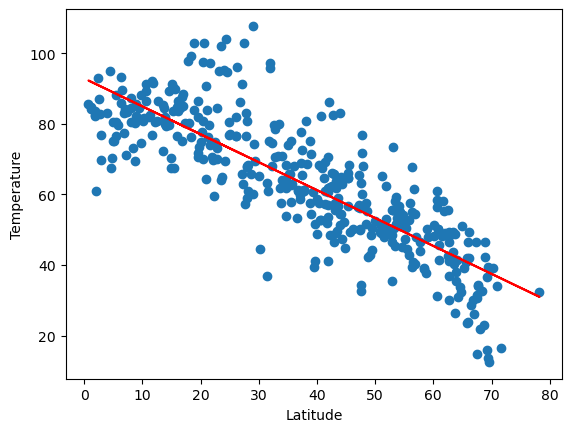

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "Temperature",(6,-10))

The r-value is: 0.6096532325501209


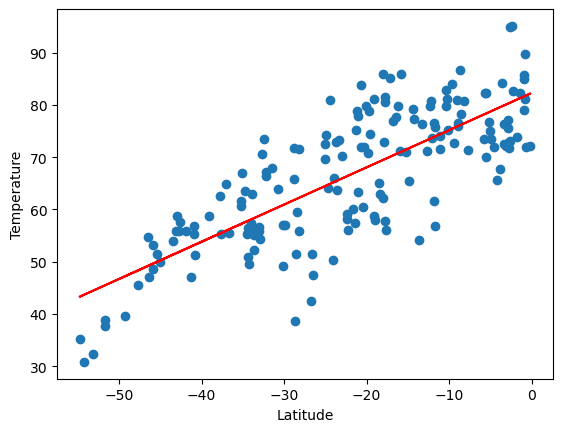

In [62]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["temperature"]
plot_linear_regression(x_values, y_values, "Temperature",(6,-10))

**Discussion about the linear relationship:** Both northern and southern hemispheres show a strong relationship to temperature. Southern hemisphere examples a positive relationship and northern examples a negative relationship. The closer to the equator you get, the warmer the temperature becomes on average.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00946248749699571


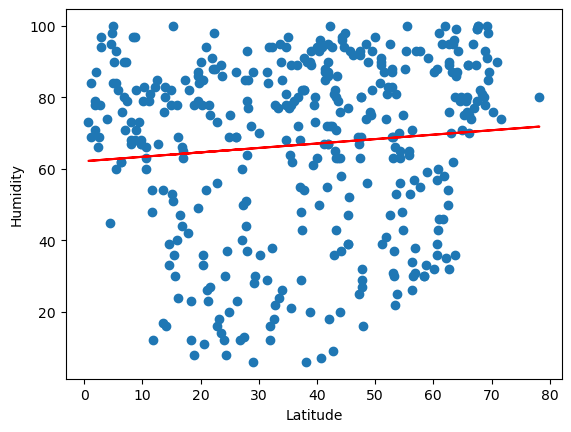

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

The r-value is: 0.005369122329527639


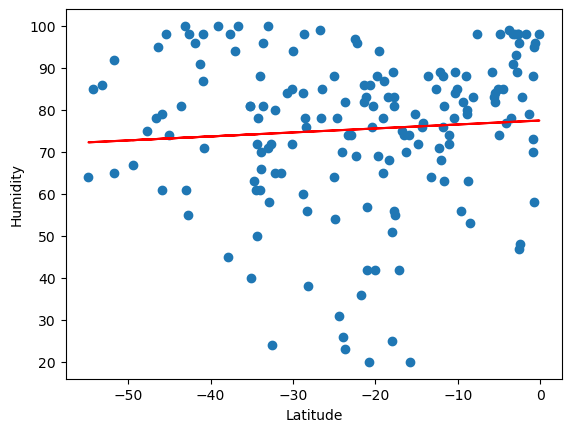

In [78]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(6,-10))

**Discussion about the linear relationship:** No strong relationship seen.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.022900761940210252


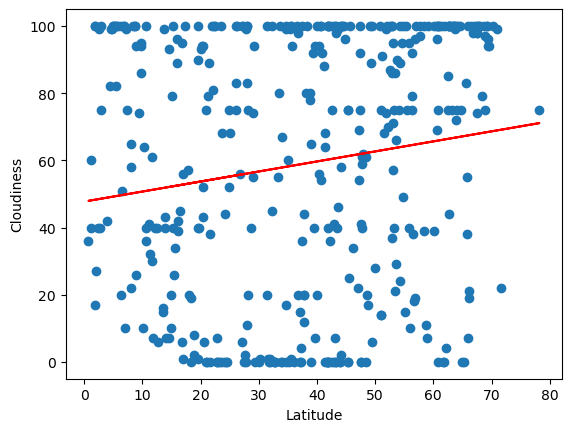

In [65]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))

The r-value is: 0.0064787756845886045


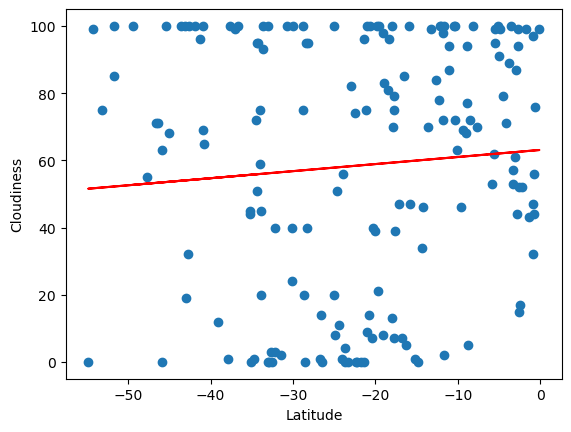

In [66]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(6,-10))

**Discussion about the linear relationship:** No strong relationship seen.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012808140384025689


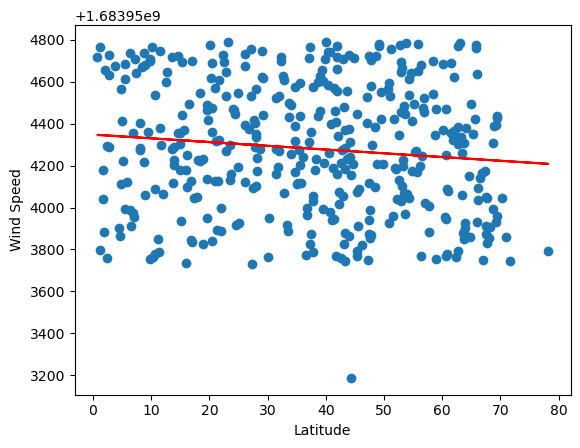

In [67]:
# Northern Hemisphere
x_values = northern_hemi_df["latitude"]
y_values = northern_hemi_df["wind_speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))

The r-value is: 0.0064787756845886045


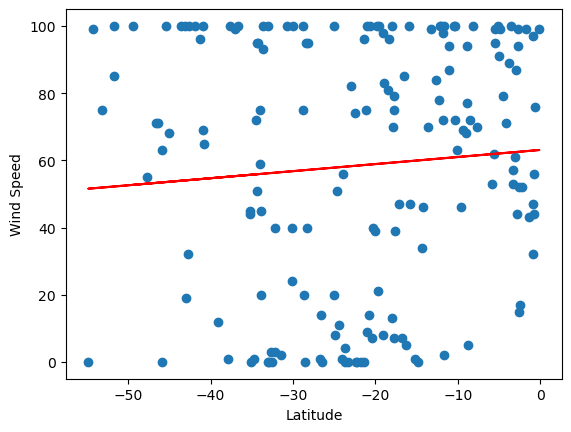

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["latitude"]
y_values = southern_hemi_df["cloudiness"]
plot_linear_regression(x_values, y_values, "Wind Speed",(6,-10))

**Discussion about the linear relationship:** No strong relationship seen.